In [9]:
from typing import NotRequired
from typing_extensions import TypedDict
import uuid

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
import requests

# Define a TypedDict to represent the state
class State(TypedDict):
    url: str
    result: NotRequired[str]

def call_api(state: State):
    """Example node that makes an API request."""
    result = requests.get(state['url']).text  # Side-effect
    return {
        "result": result
    }

# Create a StateGraph builder and add a node for the call_api function
builder = StateGraph(State)
builder.add_node("call_api", call_api)

# Connect the start and end nodes to the call_api node
builder.add_edge(START, "call_api")
builder.add_edge("call_api", END)

# Specify a checkpointer
checkpointer = MemorySaver()

# Compile the graph with the checkpointer
graph = builder.compile(checkpointer=checkpointer)


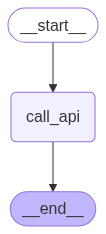

In [10]:
builder.compile(checkpointer=checkpointer)

In [ ]:

# Define a config with a thread ID.
thread_id = uuid.uuid4()
config = {"configurable": {"thread_id": thread_id}}

# Invoke the graph
result=graph.invoke({"url": "https://www.chrismytton.com/plain-text-websites/"}, config)

In [12]:
result

{'url': 'https://www.chrismytton.com/plain-text-websites/',
 'result': '<!DOCTYPE html>\n<html lang="en" class="bg-zinc-50 dark:bg-zinc-800 text-zinc-800 dark:text-zinc-50">\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Plain text websites – Chris Mytton</title>\n\n    <meta property="og:title" content="Plain text websites">\n    <meta name="author" content="Chris Mytton">\n    <meta property="og:locale" content="en_GB">\n    <meta name="description" content="In a world of web apps, videos, social media and multi-media distraction it&#39;s nice to know there are still some websites out there which use simple plain text">\n    <meta property="og:description" content="In a world of web apps, videos, social media and multi-media distraction it&#39;s nice to know there are still some websites out there which use simple plain text">\n    <link rel="canonic

In [ ]:
result["result"]

'<!DOCTYPE html>\n<html lang="en" class="bg-zinc-50 dark:bg-zinc-800 text-zinc-800 dark:text-zinc-50">\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Plain text websites – Chris Mytton</title>\n\n    <meta property="og:title" content="Plain text websites">\n    <meta name="author" content="Chris Mytton">\n    <meta property="og:locale" content="en_GB">\n    <meta name="description" content="In a world of web apps, videos, social media and multi-media distraction it&#39;s nice to know there are still some websites out there which use simple plain text">\n    <meta property="og:description" content="In a world of web apps, videos, social media and multi-media distraction it&#39;s nice to know there are still some websites out there which use simple plain text">\n    <link rel="canonical" href="https://www.chrismytton.com/plain-text-websites/">\n    <meta

In [14]:
result["url"]

'https://www.chrismytton.com/plain-text-websites/'

# with tool durable

In [15]:
from typing import NotRequired
from typing_extensions import TypedDict
import uuid

from langgraph.checkpoint.memory import MemorySaver
from langgraph.func import task
from langgraph.graph import StateGraph, START, END
import requests

# Define a TypedDict to represent the state
class State(TypedDict):
    urls: list[str]
    result: NotRequired[list[str]]


@task
def _make_request(url: str):
    """Make a request."""
    return requests.get(url).text[:100]

def call_api(state: State):
    """Example node that makes an API request."""
    requests = [_make_request(url) for url in state['urls']]
    results = [request.result() for request in requests]
    return {
        "results": results
    }

# Create a StateGraph builder and add a node for the call_api function
builder = StateGraph(State)
builder.add_node("call_api", call_api)

# Connect the start and end nodes to the call_api node
builder.add_edge(START, "call_api")
builder.add_edge("call_api", END)

# Specify a checkpointer
checkpointer = MemorySaver()

# Compile the graph with the checkpointer
graph = builder.compile(checkpointer=checkpointer)

# Define a config with a thread ID.
thread_id = uuid.uuid4()
config = {"configurable": {"thread_id": thread_id}}

# Invoke the graph
graph.invoke({"urls": ["https://www.chrismytton.com/plain-text-websites/"]}, config)

{'urls': ['https://www.chrismytton.com/plain-text-websites/']}

In [17]:
# Simulate a function that returns a request object
def _make_request(url):
    print(f"Calling _make_request with: {url}")
    return f"FakeRequestResult({url})"  # Simulated result object

# Simulate state with a list of URLs
state = {
    'urls': ['url1', 'url2', 'url3']
}

# Step 1: Loop through URLs and call the function
print("Step 1: Making requests")
requests = [_make_request(url) for url in state['urls']]
print("Requests list:", requests)

# Step 2: Imagine .result() is used to get final values (we'll simulate that too)
print("\nStep 2: Getting results from requests")
results = [f"FinalResult({req})" for req in requests]
print("Results list:", results)


Step 1: Making requests
Calling _make_request with: url1
Calling _make_request with: url2
Calling _make_request with: url3
Requests list: ['FakeRequestResult(url1)', 'FakeRequestResult(url2)', 'FakeRequestResult(url3)']

Step 2: Getting results from requests
Results list: ['FinalResult(FakeRequestResult(url1))', 'FinalResult(FakeRequestResult(url2))', 'FinalResult(FakeRequestResult(url3))']


In [18]:
from typing import Tuple, List, Dict, Optional
from dataclasses import dataclass
from datetime import datetime
import asyncio

class NeuralTerminal:
    """Advanced AI Development Interface"""
    def __init__(self):
        self.boot_time = datetime.now()
        self.status = "🔥 Optimizing Neural Pathways..."
        self.passion_level = float('inf')

class CodeWithDark:
    """Core AI System Architecture"""
    def __init__(self):
        self.codename = "CodeWithDark"
        self.version = "2.0.0-beta"
        self.mission = "Democratizing AI, One Line at a Time"

def GPU_poor_but_spirit_rich(cls):
    """
    ⚠️ Hardware Status: GPU Bottleneck Detected
    Current Reality: Integrated Graphics 😢
    Dream Setup: NVIDIA RTX 4090 | Tesla A100 💫
    Motto: "Great code doesn't need great hardware, but it helps!"
    """
    return cls

@dataclass
class SystemSpecs:
    processor: str
    ram: str
    gpu: Optional[str] = None
    dreams: str = "Unlimited"

@GPU_poor_but_spirit_rich
class DarkArchitecture(CodeWithDark):
    """
    🎯 Primary Interface for CodeWithDark's Development Ecosystem
    Status: Online | Learning | Building | Sharing
    """
    
    def __init__(self):
        super().__init__()
        self.initialize_neural_networks()
    
    async def initialize_neural_networks(self):
        """Boot sequence for AI systems"""
        await asyncio.sleep(0.1)  # Simulating deep learning
        print("🧠 Neural pathways: Activated")
        print("📚 Knowledge base: Continuously expanding")
        print("🤝 Collaboration mode: Always ON")

    @property
    def connect_with_me(self) -> Dict[str, str]:
        """
        🌐 Multi-dimensional Communication Matrix
        Status: Always Open for Innovation & Collaboration
        """
        return {
            "professional": "linkedin.com/in/codewithdark",
            "social": "facebook.com/codewithdark.fb",
            "email": "codewithdark90@gmail.com",
            "links": "linktr.ee/codewithdark",
            "motto": "Let's build the future together! 🚀"
        }

    @property
    def human_interface(self) -> Dict[str, any]:
        """
        🌍 Human-AI Interface Properties
        """
        return {
            "languages": ['Urdu', 'Poshto', 'English'],
            "age": 19,
            "location": "🌍 Global Digital Nomad",
            "timezone": "UTC+5 (Pakistan)",
            "coffee_dependency": "High ☕",
            "debugging_superpower": "Rubber Duck Debugging 🦆"
        }

    @property
    def tech_arsenal(self) -> Dict[str, any]:
        """
        🛠️ Technical Capabilities & Arsenal
        Status: Continuously Evolving & Upgrading
        """
        return {
            "core_expertise": {
                "🔥 expert": ["Python", "Computer Vision", "NLP", "Agentic AI"],
                "📈 intermediate": ["LLMs", "vLLM", "Mathematics", "Deep Learning"],
                "🌱 learning": ["Reinforcement Learning", "Julia", "JAX", "Quantum Computing"]
            },
            "specialization": [
                "🤖 AI/ML Solution Architecture",
                "🏗️ Backend System Design",
                "🧠 Artificial Intelligence Research",
                "📊 Data Science & Analytics"
            ],
            "development_environment": {
                "preferred_ides": ["PyCharm 🐍", "VSCode ⚡", "Google Colab 🔬"],
                "current_battlestation": SystemSpecs(
                    processor="Intel(R) Core(TM) i5-7300U CPU",
                    ram="8GB",
                    gpu="Integrated Graphics (The Struggle is Real)",
                ),
                "dream_setups": {
                    "realistic_dream": SystemSpecs(
                        processor="Intel(R) Core(TM) i9-12900K",
                        ram="64GB",
                        gpu="NVIDIA GeForce RTX 4090"
                    ),
                    "ultimate_fantasy": SystemSpecs(
                        processor="AMD Ryzen 9 5950X",
                        ram="128GB",
                        gpu="NVIDIA Tesla A100 (One can dream!)"
                    )
                }
            },
            "cloud_platforms": ["AWS ☁️", "GCP 🌐", "Azure 💙"],
            "favorite_frameworks": ["PyTorch 🔥", "Transformers 🧠", "JAX 👾", "FastAPI ⚡"]
        }

    def current_projects(self) -> List[str]:
        """
        🚧 What I'm Currently Building
        """
        return [
            "🤖 Custom LLM Fine-tuning Pipeline",
            "👁️ Computer Vision for Medical Imaging",
            "🔊 NLP Sentiment Analysis Tool",
            "🌟 Open Source AI Utilities",
            "📚 AI Education Content"
        ]

    def fun_facts(self) -> List[str]:
        """
        🎲 Random Facts About This Human
        """
        return [
            "🌙 I code better at night (Night Owl Developer)",
            "🧠 I train neural networks while drinking chai ☕",
            "🐍 Python is my native language (literally dream in it)",
            "⚡ I optimize algorithms for fun, not just work",
            "📖 I read research papers like novels",
            "🚀 My GitHub is my second home"
        ]

    def __str__(self) -> str:
        return f"""
        ╔══════ CodeWithDark's Neural Network Status ══════╗
        ║ 🔋 Status    : Fully Charged & Ready            ║
        ║ 🎯 Focus     : Python | AI/ML | Backend         ║
        ║ 💻 Hardware  : GPU Upgrade in Progress...       ║
        ║ 🌟 Mission   : Building AI for Everyone         ║
        ║ 📊 Mood      : Optimistic & Innovative          ║
        ╚══════════════════════════════════════════════════╝
        """

# Initialize the system
dark_system = DarkArchitecture()
print(dark_system)


        ╔══════ CodeWithDark's Neural Network Status ══════╗
        ║ 🔋 Status    : Fully Charged & Ready            ║
        ║ 🎯 Focus     : Python | AI/ML | Backend         ║
        ║ 💻 Hardware  : GPU Upgrade in Progress...       ║
        ║ 🌟 Mission   : Building AI for Everyone         ║
        ║ 📊 Mood      : Optimistic & Innovative          ║
        ╚══════════════════════════════════════════════════╝
        


C:\Users\Shaheer\AppData\Local\Temp\ipykernel_16760\2215508240.py:45: RuntimeWarning: coroutine 'DarkArchitecture.initialize_neural_networks' was never awaited
  self.initialize_neural_networks()
